In [1]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline  
#%matplotlib qt
# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt
import math

from imutils import perspective
from imutils import contours
from imutils.object_detection import non_max_suppression
import imutils

In [2]:
import sys
# adding Folder to the system path
sys.path.insert(0, 'C:\\Users\\Alejandro\\Desktop\\MIA Trabajo final\\Repositorio\\SFVI-MIA\\GUI\\PyQt Designer')

import GeometryModule as GM
from GeometryModule import segmentsMinDistance, segments_intersect, point_segment_distance, midpoint, scaleSegment, cleanOverlappingLines


In [3]:
import DrawModule as DM
import ImageUtilsModule as IUM
import VisionModule as VM
import VisionDetectionModule as VDM

image_path = '..\\images\\sudoku.png'

image = VM.loadImage(image_path, grayscale=True)

#visionProgram.getImageContours()

lines = VDM.applyProbabilisticHoughLineDetection(image, 1, 0, 250)

cleanLines = cleanOverlappingLines(lines)

imageDraw = DM.drawDetectedProbabilisticHoughLines(image, cleanLines)

imageDraw = DM.drawSegmentMinDistance(imageDraw, cleanLines[4], cleanLines[1])

#visionProgram.showImage()
#plt.imshow(imageGray, cmap = 'gray')
cv.imshow("Image", imageDraw)
cv.waitKey()

-1

TEMPATE MATCHING

In [14]:
image_path = '..\\images\\hearts_card.PNG'
tempalte_path = '..\\images\\heart_template.PNG'
image = VM.loadImage(image_path, grayscale = False)
template = VM.loadImage(tempalte_path, grayscale = False)
imageGray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
templateGray = cv.cvtColor(template, cv.COLOR_BGR2GRAY)

templateSize = template.shape

#value, location = VDM.matchTemplate(imageGray, templateGray)
#imageDraw = DM.drawTemplateMatch(image, templateSize[1], templateSize[0], location)

#values, locations = VDM.matchTemplateMultiple(imageGray, templateGray, 0.9)
#imageDraw = DM.drawMultipleTemplateMatch(image, locations, templateSize[1], templateSize[0])

#imageDraw = DM.drawAutoCannyOverImage(image)
#values, locations = VDM.cannyTemplateMatch(image, template, iterations = 5, threshold = 0.9)
#imageDraw = DM.drawMultipleTemplateMatch(imageDraw, locations, templateSize[1], templateSize[0])

#imageDraw = IUM.rotateImageWithoutCropping(template, 45)

#values, locations = VDM.matchTemplateInvariantRotation(imageGray, templateGray, 0.9, [0, 90, 180])
#imageDraw = DM.drawTemplateMatchInvariant(image, locations, templateSize[1], templateSize[0])

#imageDraw = IUM.scaleImage(template, 50)

#values, locations = VDM.matchTemplateInvariantScale(imageGray, templateGray, 0.9, [40, 42, 45, 100])
#imageDraw = DM.drawTemplateMatchInvariant(image, locations, templateSize[1], templateSize[0])

#values, locations = VDM.matchTemplateInvariant(imageGray, templateGray, 0.9, [40, 42, 45, 100], [0, 90, 180])
#imageDraw = DM.drawTemplateMatchInvariant(image, locations, templateSize[1], templateSize[0])

#values, locations = VDM.cannyTemplateMatchInvariant(imageGray, templateGray, iterations = 10, threshold = 0.6, scaleValues = range(40,100,2), rotationAngles = [0, 90, 180])
#imageDraw = DM.drawTemplateMatchInvariant(image, locations, templateSize[1], templateSize[0])
#print(locations)

#imageDraw = VM.applyAutoCanny(image)
#imageDraw = cv.dilate(imageDraw, kernel = (3,3), iterations = 5)

#plt.imshow(imageGray, cmap = 'gray')
cv.imshow("Image", imageDraw)
cv.waitKey()

-1

In [30]:
#TEMPLATE MATCHING INVARIANTE
# https://github.com/cozheyuanzhangde/Invariant-TemplateMatching/blob/main/InvariantTM.py
# https://github.com/cozheyuanzhangde/Invariant-TemplateMatching/blob/main/InvariantTM_rgbdiff.py
# https://github.com/DennisLiu1993/Fastest_Image_Pattern_Matching/blob/main/MatchTool/MatchToolDlg.cpp

In [31]:
#VER PARA QUE LOS TEMPLATE MATCHING PUEDAN AJUSTARSE POR SIZE-ASPECT-ROTATION
#PROBAR USAR FEATURE MATCHING PARA HACER MATCHING https://docs.opencv.org/4.x/dc/dc3/tutorial_py_matcher.html
#https://stackoverflow.com/questions/42938149/opencv-feature-matching-multiple-objects
#REVISAR FIND HOMOGRAFY: https://docs.opencv.org/3.4/d1/de0/tutorial_py_feature_homography.html


MATCHING CON DESCRIPTORES

In [32]:
image_path = '..\\images\\hearts_card.PNG'
tempalte_path = '..\\images\\heart_template.PNG'
image = loadImage(image_path, grayscale = False)
template = loadImage(tempalte_path, grayscale = False)
image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
template = cv.cvtColor(template, cv.COLOR_BGR2GRAY)

templateSize = template.shape

# display the  image and template to our screen
cv.imshow("Image", imageDraw)
cv.waitKey()

-1

number of estimated clusters : 10
430
432
172
109
97
86
101
112
47
42


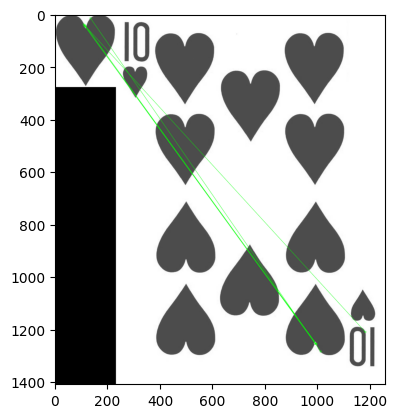

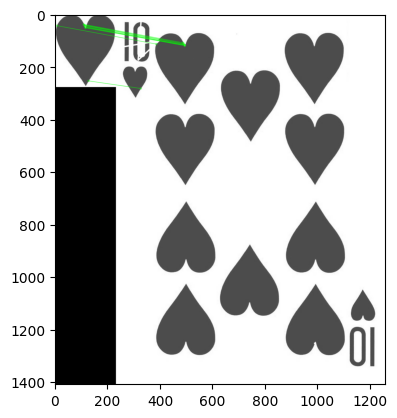

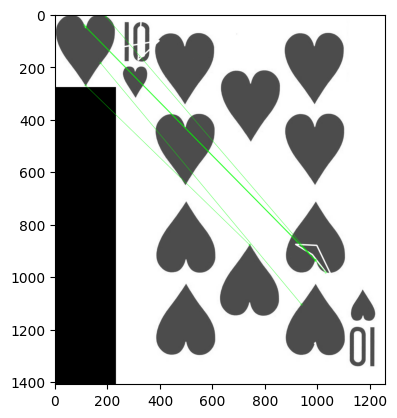

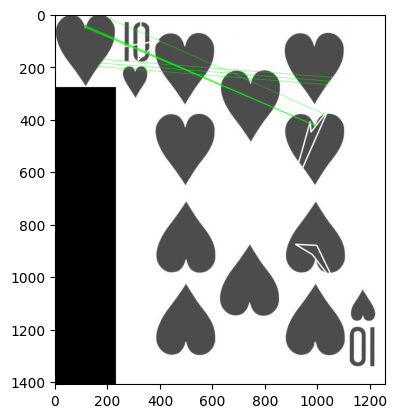

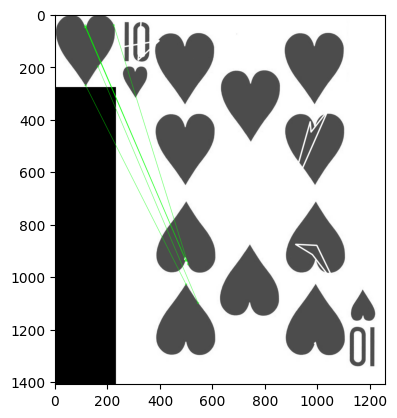

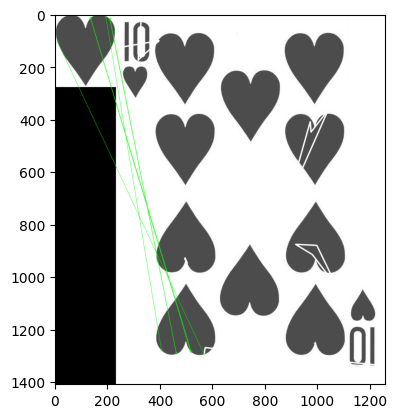

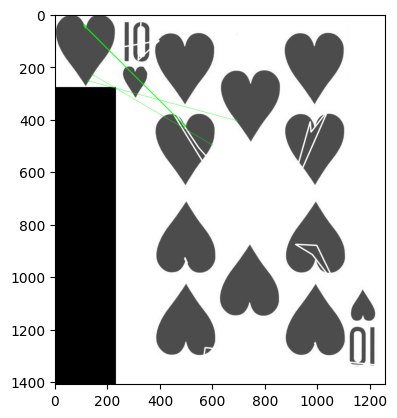

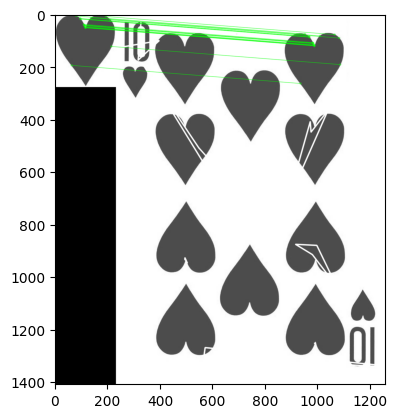

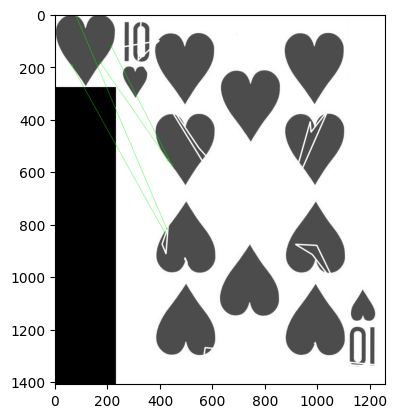

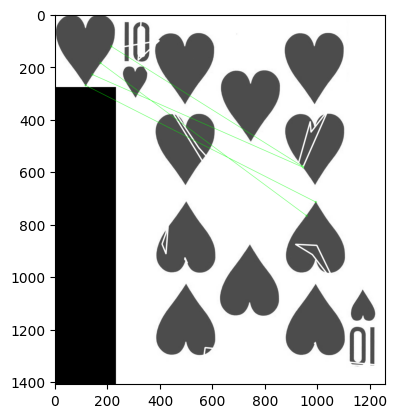

In [33]:
image_path = '..\\images\\hearts_card.PNG'
tempalte_path = '..\\images\\heart_template.PNG'
template = loadImage(image_path, grayscale = False)
image = loadImage(tempalte_path, grayscale = False)
image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
template = cv.cvtColor(template, cv.COLOR_BGR2GRAY)

from sklearn.cluster import MeanShift, estimate_bandwidth

MIN_MATCH_COUNT = 10

orb = cv.ORB_create(10000, 1.2, nlevels=8, edgeThreshold = 5)

# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(image, None)
kp2, des2 = orb.detectAndCompute(template, None)

x = np.array([kp2[0].pt])

for i in range(len(kp2)):
    x = np.append(x, [kp2[i].pt], axis=0)

x = x[1:len(x)]

bandwidth = estimate_bandwidth(x, quantile=0.1, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, cluster_all=True)
ms.fit(x)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("number of estimated clusters : %d" % n_clusters_)

s = [None] * n_clusters_
for i in range(n_clusters_):
    l = ms.labels_
    d, = np.where(l == i)
    print(d.__len__())
    s[i] = list(kp2[xx] for xx in d)

des2_ = des2

for i in range(n_clusters_):

    kp2 = s[i]
    l = ms.labels_
    d, = np.where(l == i)
    des2 = des2_[d, ]

    FLANN_INDEX_KDTREE = 0
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 10)
    search_params = dict(checks = 50)

    flann = cv.FlannBasedMatcher(index_params, search_params)

    des1 = np.float32(des1)
    des2 = np.float32(des2)

    matches = flann.knnMatch(des1, des2, 2)

    # store all the good matches as per Lowe's ratio test.
    good = []
    for m,n in matches:
        if m.distance < 0.9*n.distance:
            good.append(m)

    if len(good)>3:
        src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
        dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

        M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC, 2)

        if M is None:
            print ("No Homography")
        else:
            matchesMask = mask.ravel().tolist()

            h,w = image.shape
            pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
            dst = cv.perspectiveTransform(pts,M)

            template = cv.polylines(template,[np.int32(dst)],True,255,3, cv.LINE_AA)

            draw_params = dict(matchColor=(0, 255, 0),  # draw matches in green color
                               singlePointColor=None,
                               matchesMask=matchesMask,  # draw only inliers
                               flags=2)

            img3 = cv.drawMatches(image, kp1, template, kp2, good, None, **draw_params)

            plt.imshow(img3, 'gray'), plt.show()

    else:
        print ("Not enough matches are found - %d/%d" % (len(good),MIN_MATCH_COUNT))
        matchesMask = None

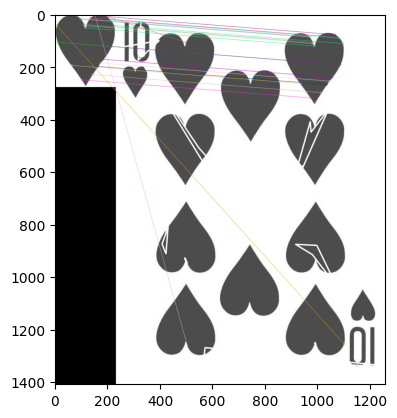

(<matplotlib.image.AxesImage at 0x23ef9782710>, None)

In [34]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Initiate ORB detector
orb = cv.ORB_create(10000, 1.2, nlevels=8, edgeThreshold = 5)

# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(image, mask = None)
kp2, des2 = orb.detectAndCompute(template, mask = None)

# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
#matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img3 = cv.drawMatches(image,kp1,template,kp2,matches[:20],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

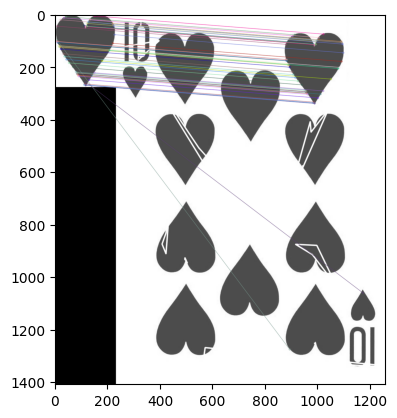

(<matplotlib.image.AxesImage at 0x23ee44687d0>, None)

In [35]:
# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(image, mask = None)
kp2, des2 = sift.detectAndCompute(template, mask = None)
# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(image,kp1,template,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

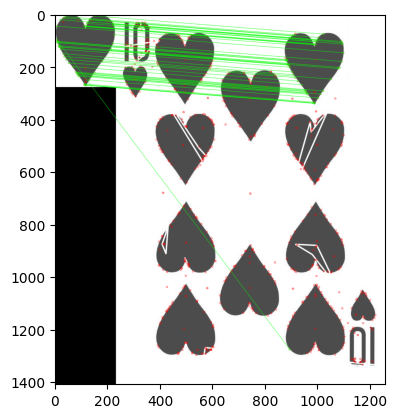

(<matplotlib.image.AxesImage at 0x23ef9721010>, None)

In [36]:
# Initiate SIFT detector
sift = cv.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(image, mask = None)
kp2, des2 = sift.detectAndCompute(template, mask = None)

# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50) # or pass empty dictionary

flann = cv.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]
draw_params = dict(matchColor = (0,255,0),singlePointColor = (255,0,0),
                   matchesMask = matchesMask,flags = cv.DrawMatchesFlags_DEFAULT)

img3 = cv.drawMatchesKnn(image,kp1,template,kp2,matches,None,**draw_params)
plt.imshow(img3,),plt.show()

In [37]:
def featureMatching(image, template):
    MIN_MATCH_COUNT = 10
    # Initiate SIFT detector
    sift = cv.SIFT_create()
    # find the keypoints and descriptors with SIFT
    kp1, des1 = sift.detectAndCompute(image, mask = None)
    kp2, des2 = sift.detectAndCompute(template, mask = None)
    
    FLANN_INDEX_KDTREE = 1
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    search_params = dict(checks = 50)
    flann = cv.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(des1,des2,k=2)

    # store all the good matches as per Lowe's ratio test.
    good = []
    for m,n in matches:
        if m.distance < 0.9*n.distance:
            good.append(m)
    print(good)
    if len(good) > MIN_MATCH_COUNT:
        src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
        dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
        M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)
        angle = - math.atan2(M[0,1], M[0,0]) * 180 / math.pi
        matchesMask = mask.ravel().tolist()
        h,w = image.shape
        pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
        dst = cv.perspectiveTransform(pts,M)
        template = cv.polylines(template,[np.int32(dst)],True,255,3, cv.LINE_AA)
    else:
        print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
        matchesMask = None
    
    draw_params = dict(matchColor = (0,255,0), singlePointColor = None, matchesMask = matchesMask, flags = 2)
    retImage = cv.drawMatches(image,kp1,template,kp2,good,None,**draw_params)
    return retImage, angle

In [38]:
def sliding_window(image, stepSize, windowSize):
	# slide a window across the image
	for y in range(0, image.shape[0], stepSize):
		for x in range(0, image.shape[1], stepSize):
			# yield the current window
			yield (x, y, image[y:y + windowSize[1], x:x + windowSize[0]])

In [39]:
def featureMatching(image, template):
    MIN_MATCH_COUNT = 10
    # Initiate ORB detector
    orb = cv.ORB_create(nfeatures = 500, scaleFactor = 1.1, nlevels=12, edgeThreshold = 3, patchSize = 31)

    # find the keypoints and descriptors with ORB
    kp1, des1 = orb.detectAndCompute(image, mask = None)
    kp2, des2 = orb.detectAndCompute(template, mask = None)

    # create BFMatcher object
    bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
    # Match descriptors.
    matches = bf.match(des1,des2)
    # Sort them in the order of their distance.
    matches = sorted(matches, key = lambda x:x.distance)

    if len(matches) > MIN_MATCH_COUNT:
        src_pts = np.float32([ kp1[m.queryIdx].pt for m in matches ]).reshape(-1,1,2)
        dst_pts = np.float32([ kp2[m.trainIdx].pt for m in matches ]).reshape(-1,1,2)
        M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)
        angle = - math.atan2(M[0,1], M[0,0]) * 180 / math.pi
        matchesMask = mask.ravel().tolist()
        h,w = image.shape
        pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
        dst = cv.perspectiveTransform(pts,M)
        #template = cv.polylines(template,[np.int32(dst)],True,255,3, cv.LINE_AA)
    else:
        print( "Not enough matches are found - {}/{}".format(len(matches), MIN_MATCH_COUNT) )
        matchesMask = None
    
    draw_params = dict(matchColor = (0,255,0), singlePointColor = None, matchesMask = matchesMask, flags = 2)
    retImage = cv.drawMatches(image,kp1,template,kp2,matches,None,**draw_params)
    return retImage, angle

28
[-1.9000175205616368, 1.0433644110257236, 1.4984207300315477, -0.4372559740381267, 2.243556284482041, -0.3969367751169351, 0.1886363018891731, -0.5382196450302048, 0.3103526688128136, -1.3039953080363036, -2.723761298991462, 1.2398926570445428, 0.4317168177012991, 1.329441501953172, -2.5445624738667814, -0.07997256565718716, 2.245438674937941, -177.01490631934172, 178.57263991389442, -178.27471326716963, 179.29653566964487, -178.1273132024101, -179.48523450089425, -178.46873741418466, 178.43984787683564, 178.93315376050163, 178.63313544115584, -177.23885103075466]
[0.8214144706726074, 0.8895444869995117, 0.8528505563735962, 0.9390267133712769, 0.7108340263366699, 0.9463241100311279, 0.7647122144699097, 0.9142575263977051, 0.9518160223960876, 0.87300705909729, 0.7426377534866333, 0.8838062286376953, 0.9408947229385376, 0.8740599155426025, 0.759541392326355, 0.9639403223991394, 0.791296124458313, 0.7097474336624146, 0.8244865536689758, 0.8095289468765259, 0.8625231981277466, 0.7960454

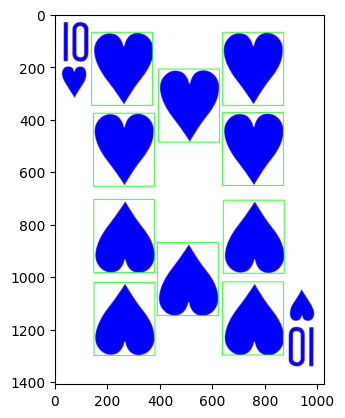

In [82]:
image_path = '..\\images\\hearts_card.PNG'
tempalte_path = '..\\images\\heart_template.PNG'
image_og = loadImage(image_path, grayscale = False)
template_og = loadImage(tempalte_path, grayscale = False)
image = cv.cvtColor(image_og, cv.COLOR_BGR2GRAY)
template = cv.cvtColor(template_og, cv.COLOR_BGR2GRAY)
image = imutils.auto_canny(image)
template = imutils.auto_canny(template)

#image = rotateImageWithoutCropping(image, 90)
#image = scaleImage(image, 100)
'''
template_copy = template.copy()
image_copy = image.copy()

imageDraw, angle = featureMatching(template, image)
print(angle)

rotatedTemplate = rotateImageWithoutCropping(template_copy, angle)

image_dilate = cv.dilate(image_copy, kernel = (35,35), iterations = 15)
template_dilate = cv.dilate(rotatedTemplate, kernel = (35,35), iterations = 15)
image_dilate = applyOtsuThreshold(image_dilate)
template_dilate = applyOtsuThreshold(template_dilate)


value, location = matchTemplate(rotatedTemplate, image_dilate)
print(value)
'''

#h,w = image.shape
locationList = []
locx = []
locy = []
valueList = []
angleList = []

ht,wt = template.shape
h = int(1.5 * ht)
w = int(1.5 * wt)
for (x, y, window) in sliding_window(image, stepSize=int(ht/4), windowSize=(w, h)):
    # if the window does not meet our desired window size, ignore it
    if window.shape[0] != h or window.shape[1] != w:
        continue
    imageDraw, angle = featureMatching(template, window)
    rotatedTemplate = rotateImageWithoutCropping(template, angle)
    image_dilate = cv.dilate(window, kernel = (35,35), iterations = 15)
    template_dilate = cv.dilate(rotatedTemplate, kernel = (35,35), iterations = 15)
    image_dilate = applyOtsuThreshold(image_dilate)
    template_dilate = applyOtsuThreshold(template_dilate)
    try:
        value, location = matchTemplate(template_dilate, image_dilate)
    except:
        continue
    if value > 0.6:
        locx.append(location[0] + x)
        locy.append(location[1] + y)
        valueList.append(value)
        angleList.append(angle)
    locationList.append((locy, locx))

print(len(angleList))
print(angleList)
print(valueList)
imageDraw = drawTemplateMatchInvariant(image_og, locationList, wt, ht)
# display the  image and template to our screen
plt.imshow(imageDraw)
plt.show()

#cv.imshow("Image", imageDraw)
#cv.waitKey()